# 딥러닝 모델
- 히든층이 많은 모델 
  - Node / Unit : 각 층을 구성하는 요소
  - Layer : 모델을 구성하는 층
  - Weight : 노드 간의 연결강도


#### 딥러닝 모델의 학습 방법
- 예측값과 실제값 간의 오차값을 최소화하기 위해 오차값을 최소화하는 모델의 인자를 찾는 알고리즘을 적용
- Loss function을 최소화하는 가중치를 찾기 위해 최적화 알고리즘을 적용

#### 예측값 구하는 방식
- 순전파 : 입력값을 바탕으로 출력 값을 계산하는 과정 

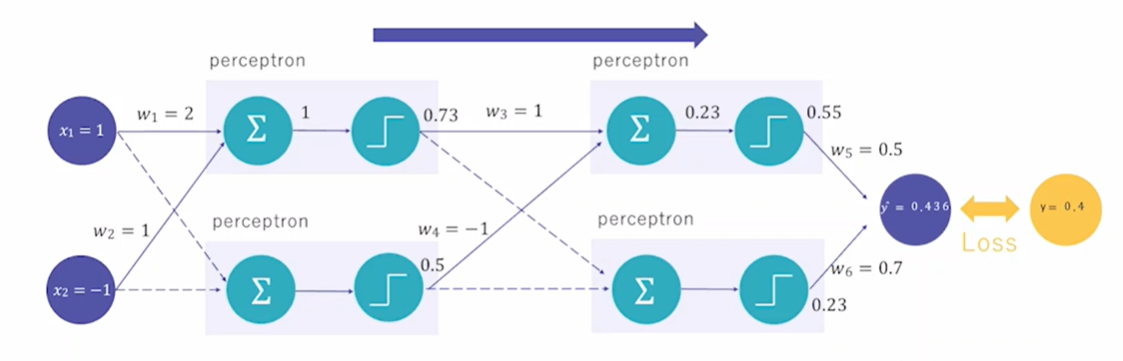

In [4]:
Image('photo/Forward.png')

- 경사 하강법 : Loss function을 최적화
   - 가중치를 Loss function 값이 작아지게 업데이트 하는 방법
   - 가중치는 Gradient 값을 사용하여 업데이트를 수행함
   - Gradient 값은 각 가중치마다 정해지며, 역전파를 통하여 구할 수 있음

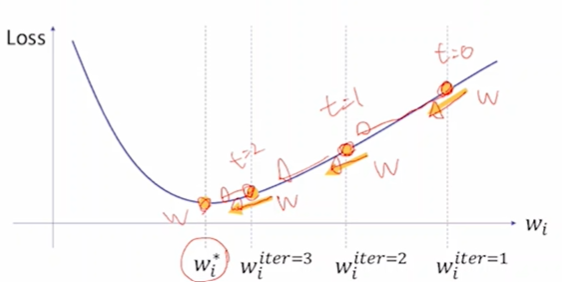

In [5]:
 Image('photo/gradient.png')

- 역전파 : 순전파의 반대 방향으로 이루어지는 과정

#### 학습 방법 정리
   1. 학습용 feature데이터를 입력하여 예측값 구하기 (순전파)
   2. 예측값과 실제값 사이의 오차 구하기 (Loss 계산)
   3. Loss를 줄일 수 있는 가중치 업데이트 하기 (역전파) - 경사하강법
   4. 1~3번 반복으로 Loss를 최소로 하는 가중치 얻기

#### TensorFlow
  - 유연하고, 효율적이며, 확장성있는 딥러닝 프레임 워크
  - 대형 클러스터 컴퓨터부터 스마트폰까지 다양한 디바이에서 동작가능


#### 딥러닝 - 데이터 전처리 
- Tensor형태의 데이터를 입력받는다.
- Tensor 란 다차원 배열로서 tensorflow에서 사용하는 객체

In [ ]:
df = pd.read_csv('data.csv')
feature = df.drop(columns=['label'])
label = df[label]

# tensor 형태로 데이터 변환
dataset = tf.data.Dataset.from_tensor_slices((feature.values,label.values))

#dataset의 batch사이즈를 32로 설정
dataset = dataset.batch(32)

#### Epoch, Batch
- 딥러닝에 사용하는 데이터는 추가적인 전처리 작업이 필요함
  - Epoch : 한 번의 epoch는 전체 데이터 셋에 대해 한 번 학습을 완료한 상태
  - Batch : 나눠진 데이터 셋 (보통 mini-batch라고 표현)
  - iteration : epoch를 나누어서 실행하는 횟수를 표현

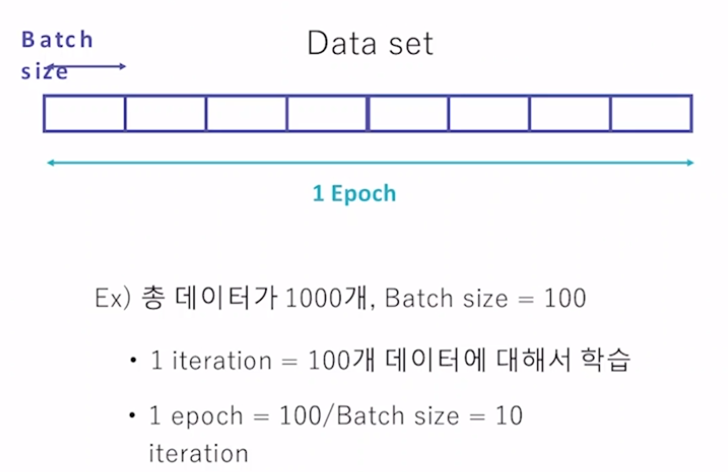

In [7]:
 Image('photo/epoch.png')

#### Keras
 - 텐서플로우의 패키지를 제공되는 고수준 API
 - 딥러닝 모델을 간단하고 빠르게 구현 가능

In [ ]:
# 모델 클라스 객체 생성
tf.keras.models.Sequential()

# 모델의 각 Layer구성
tf.keras.layers.Dense(units,activation)

 # units : 레이어 안의 Node의 수
 # activation : 적용할 activation 함수 설정 (sigmoid, relu)

1. Input Layer의 입력 형태 지정하기 
   - 입력형태에 대한 정보를 필요로 함, input_shape / input_dim 인자 설정하기

In [ ]:
# 코드 예시 1
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim=2, activation='sigmoid'),#2개의 입력 변수, 10개의 노드
    tf.keras.layers.Dense(10,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

2. 모델에 Layer추가하기
   - [model].add(tf.keras.layers.Dense(units,activation))

In [ ]:
# 코드 예시 2
model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, input_dim=2, activation='sigmoid'))#2개의 입력 변수, 10개의 노드
    model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


3. 모델 학습시키기
   - 모델 학습방식을 설정하기 위한 함수
      - [model].compile(optimizer,loss)
         - optimizer : 모델 학습 최적화 방법
         - loss : 손실 함수 설정
    - 모델을 학습시키기 위한 함수
       - [model].fit(x,y)
          - x : 학습 데이터
          - y : 학습 데이터의 label

In [ ]:
# MSE를 loss로 설정, 최적화 방식은 SGD 사용
model.compile(loss='mean_squared_error',optimizer='SGD')

# dataset에 저장된 데이터를 입력하고, epochs를 100으로 설정하고 학습
model.fit(dataset, epochs = 100)

# 모델을 평가 및 예측
model.evaluate(x_test,y_test)
predicted_labels_test = model.predict(x_test)

4. 평가 및 예측 
   - 모델을 평가하기 위한 메소드
      - [model].evaluate(x,y)
    모델로 예측을 수행하기 위한 함수
       - [model].predict(x)